
## Logistic Regression (Classification)

### Introduction

Logistic regression is a statistical and machine learning technique for modeling the probability of a binary outcome (two possible classes) based on one or more predictor variables. It is widely used in classification tasks such as spam detection, disease diagnosis, and predicting customer churn.

### Mathematical Formulation

#### Logistic Function

The logistic regression model uses the logistic (or sigmoid) function to predict probabilities. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Here, \( z \) is a linear combination of the independent variables.

#### Model Equation

The logistic regression model predicts the probability $ P(y=1|x) $ as:

$$
P(y=1|x) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)
$$

- $ y $: Dependent variable (binary: 0 or 1).
- $ x $: Independent variables (features).
- $ \beta_0 $ : Intercept.
-$  \beta_1, \beta_2, \ldots, \beta_n$ : Coefficients of the independent variables.

This is equivalent to:

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}
$$

The log-odds (logit function) is:

$$
\text{logit}(P) = \log\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
$$

### Cost Function

#### Likelihood Function

The likelihood function maximizes the probability of observing the actual data. The likelihood for \( n \) observations is:

$$
L(\beta) = \prod_{i=1}^n P(y_i|x_i)^{y_i} (1 - P(y_i|x_i))^{1 - y_i}
$$

#### Log-Likelihood

To simplify, we take the natural logarithm of the likelihood (log-likelihood):

$$
\ell(\beta) = \sum_{i=1}^n \left[ y_i \log(P(y_i|x_i)) + (1 - y_i) \log(1 - P(y_i|x_i)) \right]
$$

#### Negative Log-Likelihood (Cost Function)

The cost function to minimize becomes the negative log-likelihood:

$$
J(\beta) = -\ell(\beta) = -\sum_{i=1}^n \left[ y_i \log(P(y_i|x_i)) + (1 - y_i) \log(1 - P(y_i|x_i)) \right]
$$

where $ P(y_i|x_i) $ is the predicted probability.

### Gradient Descent

To minimize the cost function $ J(\beta) $, we use gradient descent. The partial derivative of $ J(\beta) $ with respect to $ \beta_j $ is:

$$
\frac{\partial J}{\partial \beta_j} = \sum_{i=1}^n (P(y_i|x_i) - y_i) x_{ij}
$$

The parameter $ \beta_j $ is updated iteratively:

$$
\beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}
$$

where:
- $ \alpha $: Learning rate.
- $ x_{ij} $: The $ j $-th feature of the $ i $-th example.

### Algorithm

Steps of Logistic Regression:
1. **Initialize Parameters**: Set initial values for $ \beta $ (e.g., zeros).
2. **Compute Predictions**: For each training example $ x_i $, compute the predicted probability:
    $$
    P(y_i|x_i) = \sigma(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_n x_{in})
    $$
3. **Calculate Cost**: Compute the cost function $ J(\beta) $ using the negative log-likelihood.
4. **Compute Gradients**: Compute the gradient of $J(\beta) $ with respect to each parameter $ \beta_j $.
5. **Update Parameters**: Update $ \beta $ using gradient descent:
    $$
    \beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}
    $$
6. **Repeat**: Iterate over steps 2–5 until convergence (i.e., the cost function stops changing significantly).

### Assumptions

Logistic regression relies on these assumptions:
1. **Binary Dependent Variable**: The output \( y \) is binary (0 or 1).
2. **Independent Observations**: Observations are independent of each other.
3. **Linearity of Logit**: The log-odds of the dependent variable are a linear function of the independent variables.
4. **No Multicollinearity**: Independent variables are not highly correlated.
5. **Large Sample Size**: A larger dataset improves parameter estimation.

### Applications
1. **Medical Diagnosis**: Predicting the presence or absence of a disease.
2. **Spam Detection**: Classifying emails as spam or not spam.
3. **Credit Scoring**: Assessing the likelihood of loan repayment.
4. **Customer Churn**: Predicting whether a customer will leave a service.

## EXAMPLE CODE

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

## EXAMPLE 1
Predicting if a student will pass or fail based on study hours

(8, 1) (8,)
(2, 1) (2,)
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



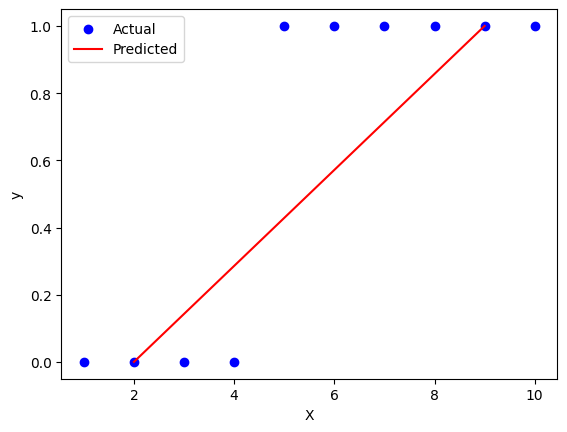

In [4]:

# Create a sample dataset
data = {'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df[['Hours_Studied']]
y = df['Passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the training and testing sets
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## EXAMPLE 2
Predicting if an Email is Spam or Not Based on Word Frequency

Confusion Matrix:
 [[0 0]
 [0 2]]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/Users/bishwashchaudhari/Machine-Learning-Notebook/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


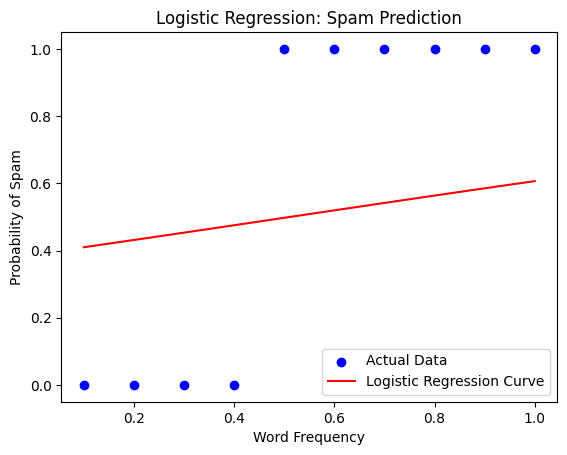

In [5]:
data = {
    'Word_Frequency': [0.1, 0.3, 0.2, 0.4, 0.5, 0.7, 0.6, 0.8, 0.9, 1.0],
    'Spam': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data, columns=['Word_Frequency', 'Spam'])

# Split the data into training and testing sets
X = df[['Word_Frequency']]  # Independent variable with feature names
y = df['Spam']              # Dependent variable (binary target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model with fixed confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=[0, 1]))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Plot the actual data points and the logistic regression curve
plt.scatter(X, y, color='blue', label='Actual Data')  # Scatterplot of actual data

# Generate smooth predictions for plotting
x_range = np.linspace(X['Word_Frequency'].min(), X['Word_Frequency'].max(), 100).reshape(-1, 1)  # Smooth range of X values
y_prob = model.predict_proba(x_range)[:, 1]  # Predicted probabilities for Spam (class=1)

plt.plot(x_range, y_prob, color='red', label='Logistic Regression Curve')  # Plot the curve
plt.xlabel('Word Frequency')
plt.ylabel('Probability of Spam')
plt.title('Logistic Regression: Spam Prediction')
plt.legend()
plt.show()

## EXAMPLE CODE 3
Predicting if a customer will churn based on monthly charges

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



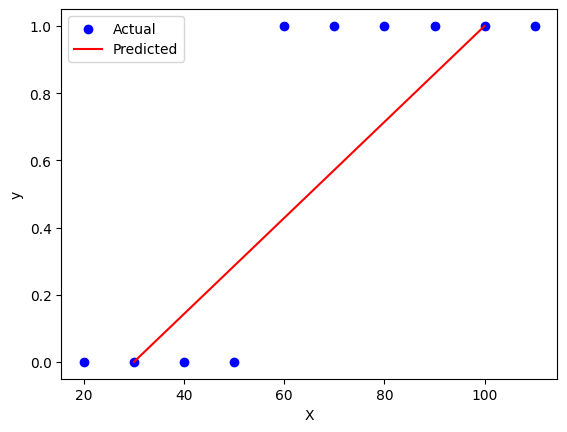

In [6]:
# Create a sample dataset
data = {'Monthly_Charges': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
    'Churn': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df[['Monthly_Charges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()